## Millionaire: Jewelry Purchase Record Analysis

 This dataset containing information about jewelry purchases. This analysis can provide valuable information about customer preferences, sales trends, and other relevant aspects of the jewelry business.

 The process begins by collecting relevant data from sales records. The collected data is then cleaned and prepared, ensuring that it is free from duplicates, inconsistencies, and missing values. Exploratory data analysis techniques are applied to understand the dataset's structure and uncover patterns or trends. Customer segmentation can be performed to identify different customer groups based on demographics, purchase behavior, or purchase history. Sales analysis helps identify popular products, peak buying seasons, and customer preferences, enabling businesses to optimize inventory management. Pricing analysis evaluates the relationship between price, sales volume, and customer behavior, aiding in pricing strategy optimization. Data visualization techniques are used to create visual representations of the analysis results, facilitating communication and pattern recognition. Finally, actionable recommendations are derived from the analysis findings, enabling businesses to improve sales, marketing, and overall performance in the jewelry industry.

 Dataset from https://www.kaggle.com/datasets/mkechinov/ecommerce-purchase-history-from-jewelry-store. This dataset contains 130K purchased jewelry products during 2-years time frame.

In [ ]:
# import libraries and plot style
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats
from scipy.stats import norm

%matplotlib inline

In [ ]:
# Import raw data
df = pd.read_csv("jewelry(Worksheet).csv")
df.head(3)

FileNotFoundError: [Errno 2] No such file or directory: 'jewelry(Worksheet).csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.columns

Index(['order time', 'order id', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [ ]:
# column titles were missing in the orginial file, therefore need to insert column names by ourselves.
df.columns = ["DateTime","OrderID", "ProductID", "Quantity", "CategoryID", "CategoryAlias", "BrandID", "USDPrice", "UserID", "Gender", "Color", "Metal", "Gem"]
df.head(3)

,DateTime,OrderID,ProductID,Quantity,CategoryID,CategoryAlias,BrandID,USDPrice,UserID,Gender,Color,Metal,Gem
0,2019-12-12 11:10:22 UTC,2.197220e+18,1.886840e+18,1,1.806830e+18,jewelry.earring,NaN,34448.60,1.515920e+18,f,white,gold,diamond
1,2021-01-06 02:03:53 UTC,2.480330e+18,1.515970e+18,1,1.806830e+18,jewelry.ring,0.0,26424.52,1.515920e+18,NaN,white,gold,mix
2,2021-08-21 11:04:01 UTC,2.645130e+18,1.515970e+18,1,1.806830e+18,jewelry.ring,0.0,26424.52,1.515920e+18,NaN,white,gold,mix


In [ ]:
df.shape

(95911, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95911 entries, 0 to 95910
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DateTime       95911 non-null  object 
 1   OrderID        95911 non-null  float64
 2   ProductID      95911 non-null  float64
 3   Quantity       95911 non-null  int64  
 4   CategoryID     90559 non-null  float64
 5   CategoryAlias  85978 non-null  object 
 6   BrandID        91126 non-null  float64
 7   USDPrice       90559 non-null  float64
 8   UserID         90559 non-null  float64
 9   Gender         47743 non-null  object 
 10  Color          88251 non-null  object 
 11  Metal          90449 non-null  object 
 12  Gem            61853 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 9.5+ MB


In [ ]:
df.describe()

,OrderID,ProductID,Quantity,CategoryID,BrandID,USDPrice,UserID
count,9.591100e+04,9.591100e+04,95911.0,9.055900e+04,9.112600e+04,90559.000000,9.055900e+04
mean,2.485185e+18,1.815969e+18,1.0,1.805948e+18,8.890964e+16,362.215217,1.512648e+18
std,1.934825e+17,2.136777e+17,0.0,2.083936e+16,3.559643e+17,444.155706,2.374813e+16
min,1.924720e+18,1.313550e+18,1.0,1.313680e+18,0.000000e+00,0.990000,1.313550e+18
25%,2.379725e+18,1.515970e+18,1.0,1.806830e+18,0.000000e+00,145.620000,1.515920e+18
50%,2.524280e+18,1.956660e+18,1.0,1.806830e+18,1.000000e+00,258.770000,1.515920e+18
75%,2.644350e+18,1.956660e+18,1.0,1.806830e+18,1.000000e+00,431.370000,1.515920e+18
max,2.719020e+18,2.541960e+18,1.0,1.806830e+18,1.550610e+18,34448.600000,1.554300e+18


In [ ]:
# identify missing or null values in a DataFrame
df.isna().sum()

DateTime             0
OrderID              0
ProductID            0
Quantity             0
CategoryID        5352
CategoryAlias     9933
BrandID           4785
USDPrice          5352
UserID            5352
Gender           48168
Color             7660
Metal             5462
Gem              34058
dtype: int64

Text(0.5, 1.0, 'Missing null values')

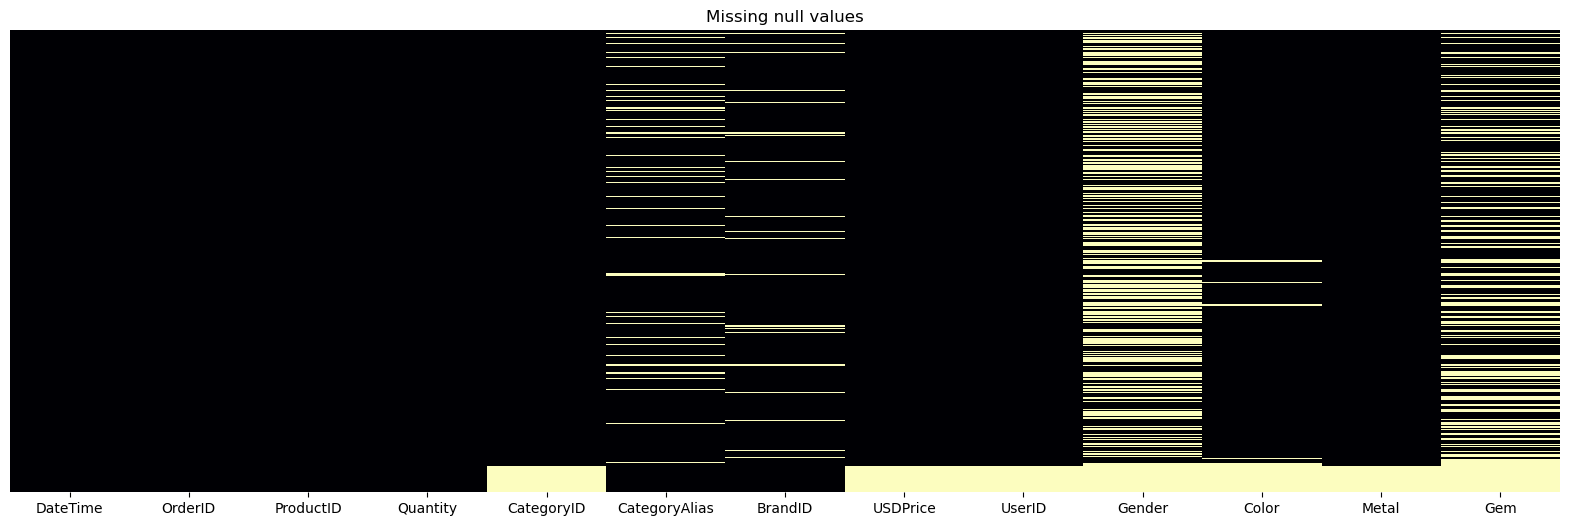

In [ ]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,6)
sns.heatmap(df.isna(),yticklabels = False, cbar = False, cmap = "magma")
plt.title("Missing null values")

In [ ]:
MissingPercentage = df.isna().sum().sort_values(ascending = False)/len(df)
MissingPercentage

Gender           0.502216
Gem              0.355100
CategoryAlias    0.103565
Color            0.079866
Metal            0.056949
CategoryID       0.055802
USDPrice         0.055802
UserID           0.055802
BrandID          0.049890
DateTime         0.000000
OrderID          0.000000
ProductID        0.000000
Quantity         0.000000
dtype: float64

Text(0.5, 1.0, 'Missig percentage of null values')

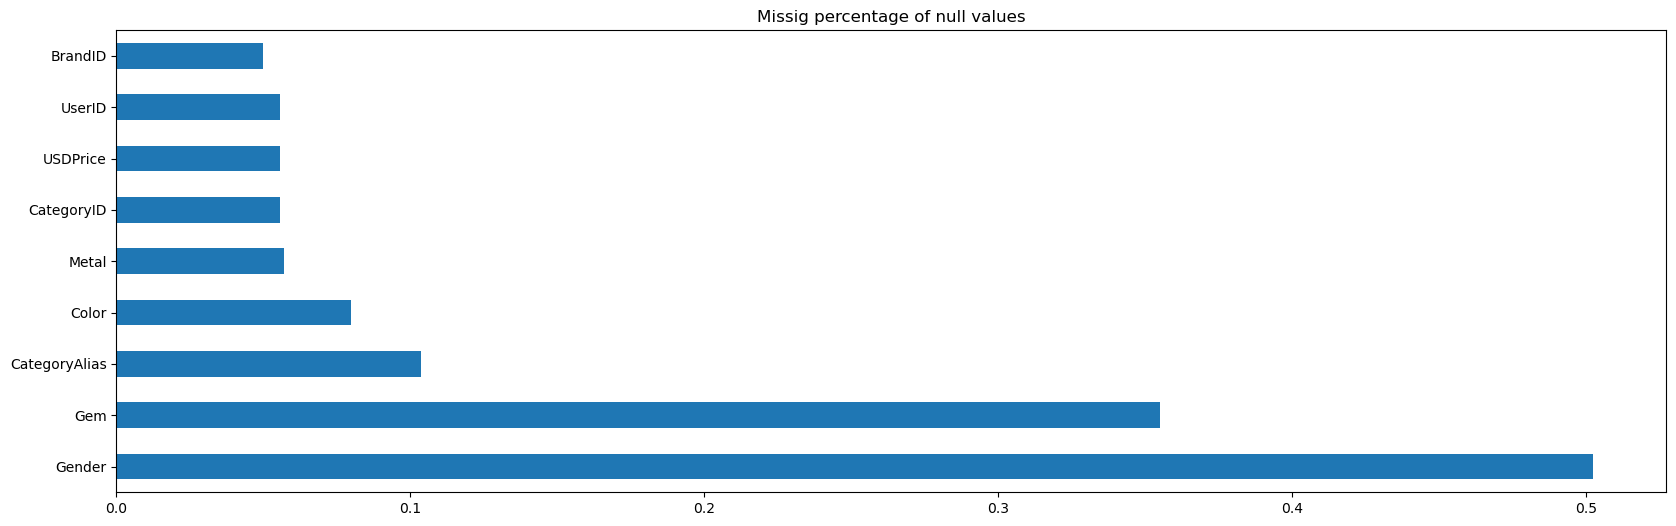

In [ ]:
MissingPercentage = MissingPercentage[MissingPercentage != 0]
matplotlib.rcParams['figure.figsize'] = (20,6)
MissingPercentage.plot(kind = 'barh')
plt.title("Missig percentage of null values")


We observed that the columns "Gender" and "Gem" have a significant number of missing values. Therefore, we will exclude these columns from our analysis to maintain the integrity and robustness of our results.

In [ ]:
df.drop(columns = ["Quantity", "CategoryID", "Gender","BrandID"], inplace=True)

In [ ]:
df['CategoryAlias'].unique()

array(['jewelry.earring', 'jewelry.ring', 'jewelry.pendant', nan,
       'jewelry.bracelet', 'jewelry.necklace', 'jewelry.brooch',
       'electronics.clocks', 'jewelry.stud', 'jewelry.souvenir', '230.12',
       '202.36', '1098.03', '321.78', '1128.62', '81.27', '34.25',
       '582.16', '227.37', '234.22', '150.55', '131.82', '2123.15',
       '109.45', '49.22', '472.47', '205.38', '2746.44', '51.08',
       '231.12', '76.97', '3054.73', '184.9', '380.1', '357.49', '15.47',
       '135.33', '719.75', '93.01', '177.95', '102.1', '595.75', '469.56',
       '427.07', '53.62', '77.53', '1469.18', '355.27', '184.89',
       '154.66', '300.58', '83.73', '271.19', '3294.21', '278.04',
       '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22', '124.88',
       '89.73', '171.23', '136.93', '19.04', '158.77', '187.1', '151.92',
       '1845.89', '87.23', '248.58', '596.48', '208.88', '193.11',
       '169.84', '1447.68', '45.07', '136.85', '282.05', '61.51',
       '210.21', '137.12', '1

In [ ]:
df["CategoryAlias"] = df["CategoryAlias"].str.split('.').str[1]

In [ ]:
df["CategoryAlias"].unique

<bound method Series.unique of 0        earring
1           ring
2           ring
3           ring
4           ring
          ...   
95906        NaN
95907        NaN
95908        NaN
95909        NaN
95910        NaN
Name: CategoryAlias, Length: 95911, dtype: object>

"CategoryAlias" column contains a significant number of irrelevant data entries. To maintain the accuracy and reliability of our analysis, it is necessary to remove these irrelevant data points from our dataset.

In [ ]:
jewelry_list = ["earring", "ring", "pendant", "bracelet", "necklace", "brooch", "stud","souvenir" ]

jewelry = df[df["CategoryAlias"].isin(jewelry_list)]

clean_jewelry = jewelry["CategoryAlias"].value_counts()

clean_jewelry

CategoryAlias
earring     29052
ring        28300
pendant     13088
bracelet     6188
necklace     2361
brooch       1288
souvenir      170
stud           12
Name: count, dtype: int64

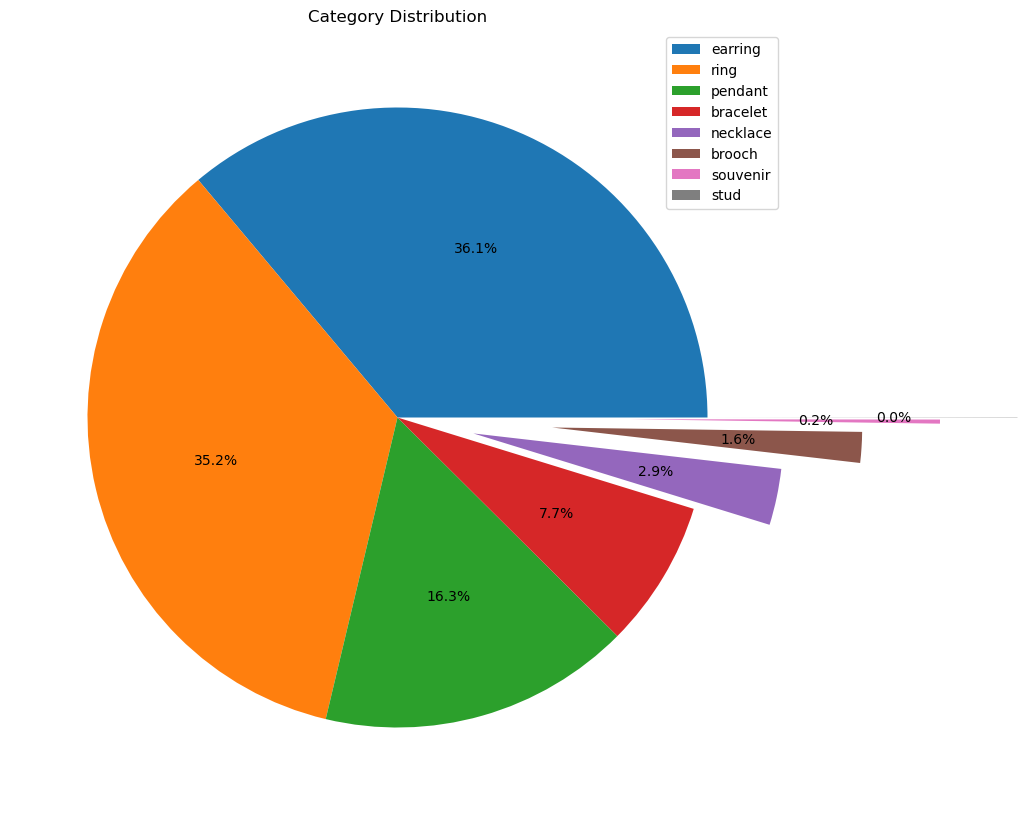

In [ ]:
# visualizing the distribution of categories in the "clean_jewelry"
plt.figure(figsize=(10, 20))
explode = (0,0,0,0,0.25,0.5,0.75,1)
plt.pie(clean_jewelry, autopct='%1.1f%%',explode=explode)

plt.title('Category Distribution')
plt.legend(labels=clean_jewelry.index, loc='upper right')
plt.show()

<Axes: xlabel='CategoryAlias'>

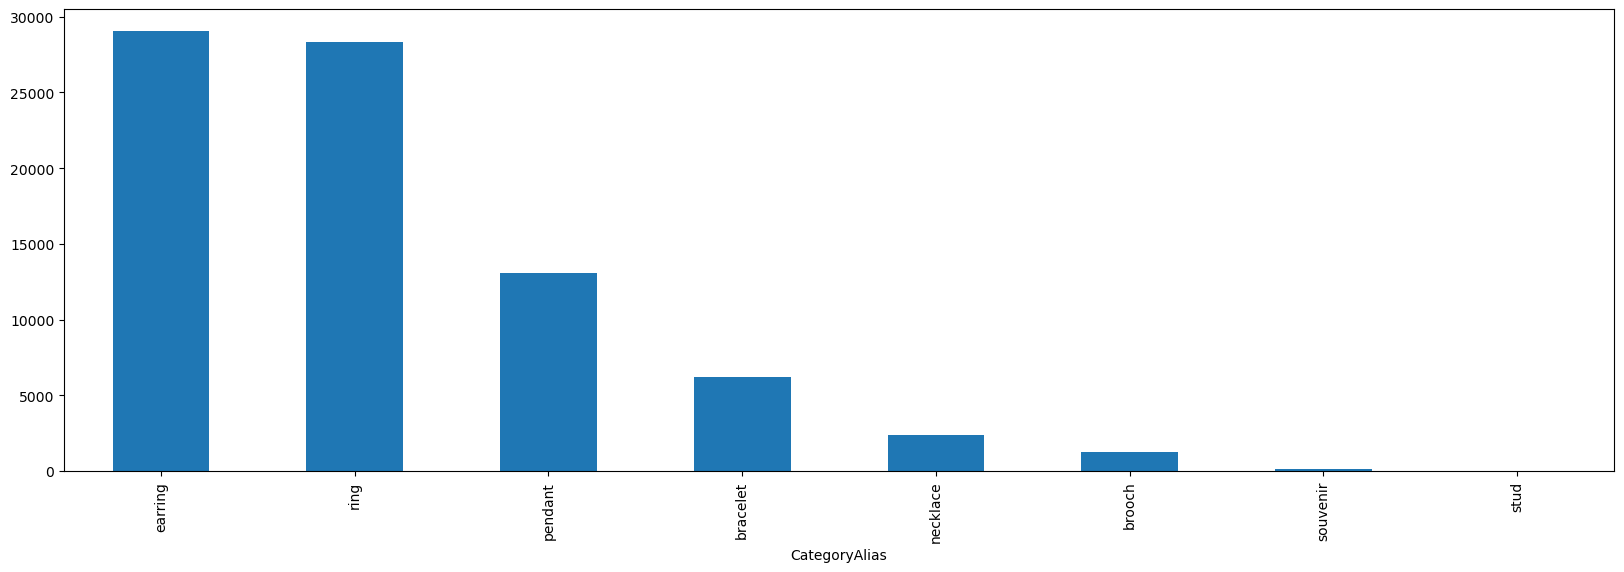

In [ ]:
clean_jewelry.plot(kind='bar')

Identify data in 'Color' and 'Metal' columns.

In [ ]:
Color = df["Color"].replace("unknown-color", "other")
Color.fillna("other", inplace = True)
Color


0        white
1        white
2        white
3        white
4        white
         ...  
95906    other
95907    other
95908    other
95909    other
95910    other
Name: Color, Length: 95911, dtype: object

In [ ]:
Color = df["Color"].value_counts()
Color

Color
red              69511
white            15286
yellow            3388
unknown-color       64
black                2
Name: count, dtype: int64

In [ ]:
Metal = df["Metal"].value_counts()
Metal

Metal
gold        89082
silver       1365
platinum        2
Name: count, dtype: int64

Visual representation of the distribution of "USDPrice" column, remove outlier and create price_range.

<Axes: >

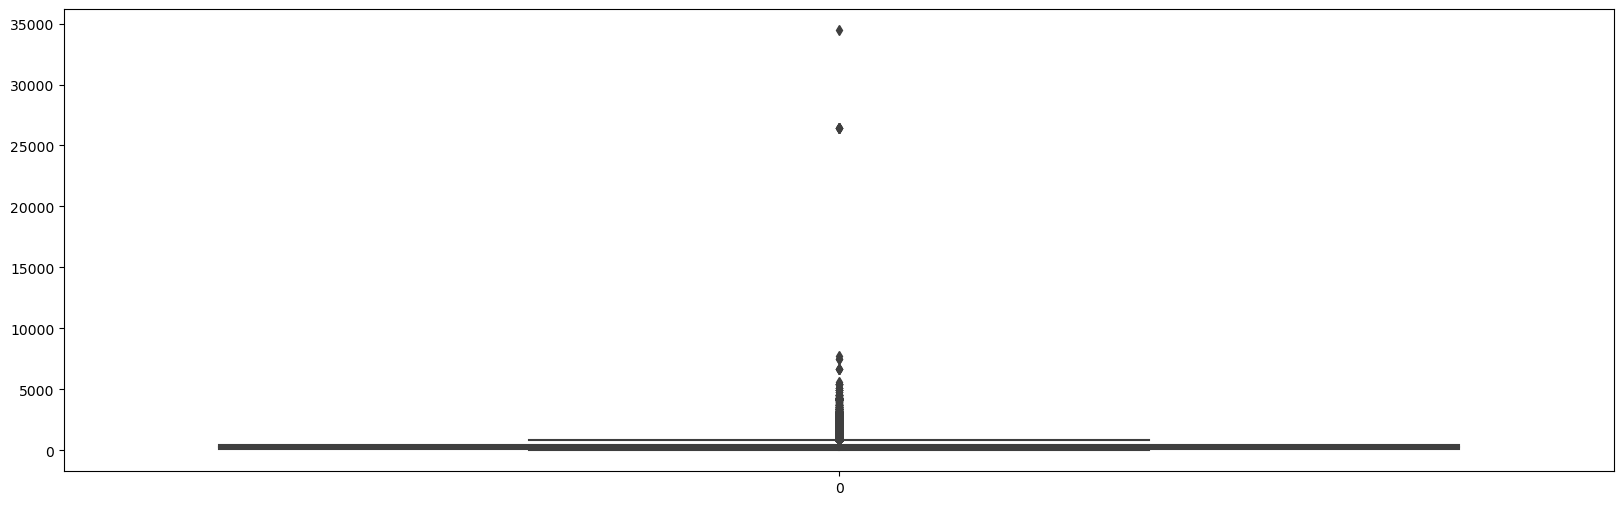

In [ ]:
sns.boxplot(df["USDPrice"])

#we meet

/var/folders/rw/jxv74n4s2574klx239qd_nv80000gn/T/ipykernel_43906/2756914369.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['USDPrice'], fit=norm);


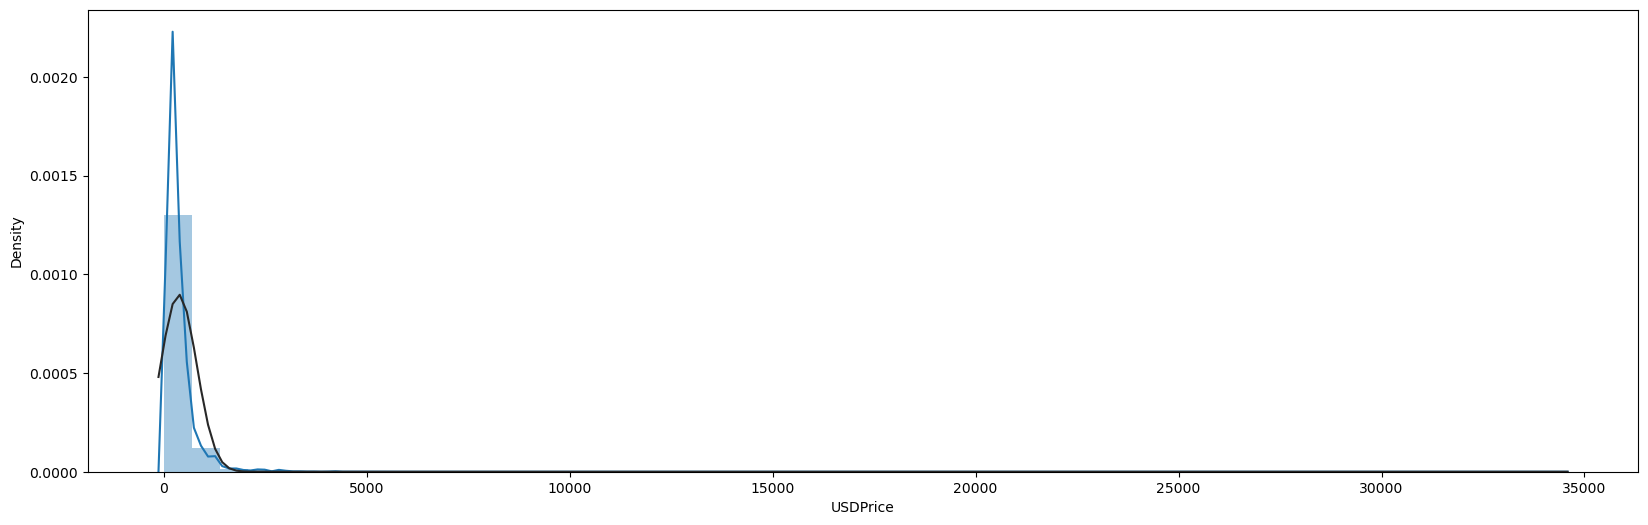

<Figure size 2000x600 with 0 Axes>

In [ ]:
sns.distplot(df['USDPrice'], fit=norm);
fig = plt.figure()

In [ ]:
import scipy.stats as stats

q1 = df["USDPrice"].quantile(0.25)
q3 = df["USDPrice"].quantile(0.75)

iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['USDPrice'] > lower_bound) & (df['USDPrice'] < upper_bound)]

In [ ]:
sns.boxplot(df["USDPrice"])

#we meet

KeyError: 0

In [ ]:
df['Price_range'] = pd.cut(df['USDPrice'], bins=[0, 100, 200, 300, 400, 500, 1000], labels=['under 100', '101-200', '201-300', '301-400', '401-500', '500-1000']).astype(object)
Price_range_value = df['Price_range'].value_counts().sort_index()

# Define the desired order of x-axis values
x_order = ['under 100', '101-200', '201-300', '301-400', '401-500', '500-1000']

Price_range_value = Price_range_value.loc[x_order]

Price_range_value.plot.bar()

In [ ]:
Price_range_value.unique

Extract the year, month, time and hour from the 'DateTime' column for further analysis.

In [ ]:
df['DateTime']
df['year'] = pd.DatetimeIndex(df['DateTime']).year
year = df['year'].value_counts
year

In [ ]:
df['month'] = pd.DatetimeIndex(df['DateTime']).month
month = df['month']
#df['month'][:5]

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract the time component from the 'DateTime' column
df['Time'] = df['DateTime'].dt.time

# Print the 'Time' column
print(df['Time'])

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Hour'] = df['DateTime'].dt.hour

print(df['Hour'])

In [ ]:
# show product purchase in each year and month.
df.groupby(['year','month'])['CategoryAlias'].count().unstack('year')

In [ ]:
df.groupby(['year','month'])['CategoryAlias'].count().unstack('year').plot(kind = "bar")

In [ ]:
filtered_df = df[df['year'].between(2019, 2021)]
grouped = filtered_df.groupby(['year', 'month'])['CategoryAlias'].count()
unstacked = grouped.unstack('year')
unstacked.plot(kind='line')

plt.xlabel('Month')
plt.ylabel('Purchase Count')
plt.title('Purchase Count of CategoryAlias by Month (2018-2022)')
plt.show()

In [ ]:
# explain why the line goes down in December 2021, because data only vaild on 1st December 2021.
december_2021_data = df[(df['year'] == 2021) & (df['month'] == 12)]

if december_2021_data.empty:
    print("No data available for December 2021.")
else:
    print("Data for December 2021:")
    print(december_2021_data)

In [ ]:
# extra visualization graph for all purchase products by month
df_2018 = df[(df['year'] == 2018) & (df['CategoryAlias'].notnull())]
salerecord_2018 = df_2018['CategoryAlias'].value_counts()
salerecord_2018.plot.bar()
plt.title('Count of Categories in 2018')
plt.show()

df_2019 = df[(df['year'] == 2019) & (df['CategoryAlias'].notnull())]
salerecord_2019 = df_2019['CategoryAlias'].value_counts()
salerecord_2019.plot.bar()
plt.title('Count of Categories in 2019')
plt.show()

df_2020 = df[(df['year'] == 2020) & (df['CategoryAlias'].notnull())]
salerecord_2020 = df_2020['CategoryAlias'].value_counts()
salerecord_2020.plot.bar()
plt.title('Count of Categories in 2020')
plt.show()

df_2021 = df[(df['year'] == 2021) & (df['CategoryAlias'].notnull())]
salerecord_2021 = df_2021['CategoryAlias'].value_counts()
salerecord_2021.plot.bar()
plt.title('Count of Categories in 2021')
plt.show()



In [ ]:
# visualization graph for sales by month
sales_by_month_product = df.groupby(["month", "CategoryAlias"])["Price_range"].count().unstack(fill_value=0)

# 繪製圖表
sales_by_month_product.plot(kind="bar", figsize=(15, 10))
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.title("Sales by Month and Product Category")
plt.show()

In [ ]:
# visualization graph for sales by year
sales_by_month_product = df.groupby(["year", "CategoryAlias"])["Price_range"].count().unstack(fill_value=0)

# 繪製圖表
sales_by_month_product.plot(kind="bar", figsize=(15, 10))
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.title("Sales by Month and Product Category")
plt.show()

In [ ]:
# visualization graph for sales by year.month
df.groupby(['year','month', 'CategoryAlias'])['CategoryAlias'].count().unstack('CategoryAlias').plot(kind = "bar")

In [ ]:
# visualization graph for price_range by year
df.groupby(['CategoryAlias','year'])['Price_range'].count().unstack('CategoryAlias').plot(kind = "bar")

Analyse the best selling item in the dataframe by color and metal.

In [ ]:
grouped = df.groupby(['Color', 'Metal'])['OrderID'].sum()

best_seller = grouped.idxmax()

best_color, best_metal = best_seller

print("The best-selling color is:", best_color)
print("The best-selling metal is:", best_metal)

In [ ]:
grouped = df.groupby(['Color', 'Metal']).size()
print(grouped)

counts_df = grouped.reset_index(name='count')

plt.bar(range(len(counts_df)), counts_df['count'])
plt.xticks(range(len(counts_df)), counts_df['Color'] + ' - ' + counts_df['Metal'], rotation=90)

plt.xlabel('Color - Metal')
plt.ylabel('Count')
plt.title('Count of Purchases by Color and Metal')
plt.show()

In [ ]:
# As red gold is the best seller, show the trend of buying habits by year.
red_gold_df = df[(df['Color'] == 'red') & (df['Metal'] == 'gold')]


year_counts = red_gold_df['year'].value_counts().sort_index()


plt.bar(year_counts.index, year_counts.values)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of "Red-Gold" Purchases by Year')

plt.show()

In [ ]:
# Find out the most frequently purchased item and the price of it
grouped = df.groupby(['CategoryAlias', 'Color', 'Metal', 'OrderID']).size()
counts_df = grouped.reset_index(name='count')
most_bought_index = counts_df['count'].idxmax()

most_bought_category = counts_df.loc[most_bought_index, 'CategoryAlias']
most_bought_color = counts_df.loc[most_bought_index, 'Color']
most_bought_metal = counts_df.loc[most_bought_index, 'Metal']

most_bought_price = df[(df['CategoryAlias'] == most_bought_category) &
                       (df['Color'] == most_bought_color) &
                       (df['Metal'] == most_bought_metal)]['USDPrice'].iloc[0]

most_bought_count = counts_df.loc[most_bought_index, 'count']

print("The most frequently purchased item is",
      most_bought_color, most_bought_metal, most_bought_category,
      "and it has been purchased", most_bought_count, "times.")
print("The price of this item is", most_bought_price)

The most frequently purchased item is red gold earring and it has been purchased 18 times.
The price of this item is 858.52


In [ ]:
# Visualizing the purchasing patterns of customers over time
jewelry_df = df[df['CategoryAlias'].isin(clean_jewelry.index)]

jewelry_df['Hour'] = jewelry_df['DateTime'].dt.hour

pivot_table = pd.pivot_table(jewelry_df, values='OrderID', index='CategoryAlias', columns='Hour', aggfunc='count')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Purchase Time Heatmap for Jewelry Products')
plt.xlabel('Hour')
plt.ylabel('CategoryAlias')
plt.show()

## Conclusion

Based on the analysis conducted, we have gained insights into the purchasing patterns of customers. It is noteworthy that the number of transactions was relatively low in 2019, possibly influenced by the impact of the COVID-19 pandemic, which affected customer buying behavior. However, there is a noticeable upward trend in the purchasing rate over time, indicating a positive trajectory.

Further examination revealed that the months of March, August, and November stood out as periods with the highest number of purchases. This surge in sales can be attributed to special holidays such as Valentine's Day and Christmas when customers are more inclined to buy jewelry as gifts. Consequently, it is evident that the demand for jewelry experiences an upsurge during these holiday seasons.

Additionally, it is worth noting that rose-gold products emerged as the top-selling category. Customers displayed a preference for jewelry within the price range of 100-300 USD. This information presents an opportunity for jewelry sellers to focus on producing more rose-gold items within this price bracket to cater to customer preferences and attract a larger customer base.

Reviewing the graph, it becomes apparent that the number of sales has consistently increased year after year. This finding suggests a positive growth trend in the jewelry market. As a result, it is advisable for jewelry sellers to consider expanding their offerings of rose-gold products within the 100-300 USD price range to capitalize on this upward trend and effectively engage customers.

By leveraging these insights, jewelry sellers can make informed decisions to optimize their product offerings and marketing strategies, thereby enhancing customer satisfaction and driving business growth.